In [237]:
from data_preprocessing import *
from feature_engineering_ import *
from model__ import *
import matplotlib.pyplot as plt
import seaborn as sns


In [252]:
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')

In [253]:
train_df

,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
0,4.7203,521.8451,MKPFX,9231.75,2019-11-10 10:42:00,OMUOI,LFUHN
1,4.9005,532.6675,MKPFX,11754.95,2019-11-10 10:42:00,OMUOI,LFUHN
2,4.7018,523.9188,MKPFX,9603.20,2019-11-10 10:42:00,OMUOI,LFUHN
3,4.6388,562.8296,MKPFX,8789.05,2019-11-10 10:42:00,OMUOI,LFUHN
4,5.0206,519.8782,MKPFX,9597.50,2019-11-10 10:42:00,OMUOI,LFUHN
...,...,...,...,...,...,...,...
296722,4.0141,283.5654,MKPFX,41394.00,2022-09-05 20:02:00,NUTZC,AWWEE
296723,5.4880,162.1160,MKPFX,15220.55,2022-09-05 20:02:00,FPZNC,NTODX
296724,5.3078,645.8933,KFEGT,41280.00,2022-09-05 20:12:00,RCDSS,EJLNQ
296725,5.2722,432.8540,MKPFX,11450.00,2022-09-05 20:42:00,OKPES,NTODX


In [254]:
# Create a lag feature for yesterday's rate (lag=1), also for 7 and 30 days ago
train_df = create_lag_features(train_df, target_column='rate', lag=1)
train_df = create_lag_features(train_df, target_column='rate', lag=7)  # Lag 7 days
train_df = create_lag_features(train_df, target_column='rate', lag=30)  # Lag 30 days

# Check the correlation between rate and lagged rates
correlation_lag1 = train_df['rate'].corr(train_df['rate_lag1'])
correlation_lag7 = train_df['rate'].corr(train_df['rate_lag7'])
correlation_lag30 = train_df['rate'].corr(train_df['rate_lag30'])

print(f"Correlation between rate and rate_lag1: {correlation_lag1:.4f}")
print(f"Correlation between rate and rate_lag7: {correlation_lag7:.4f}")
print(f"Correlation between rate and rate_lag30: {correlation_lag30:.4f}")

Correlation between rate and rate_lag1: 0.2033
Correlation between rate and rate_lag7: 0.0742
Correlation between rate and rate_lag30: 0.0463


There is little correlation between present and pas values that's why we won't add lagged features

In [258]:
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')

In [260]:
# Check missing values 
mv_train = check_missing_values(train_df)
mv_val = check_missing_values(validation_df)
mv_test = check_missing_values(test_df)
print(mv_train)
print(mv_val)
print(mv_test)

                 Missing Values  Percentage (%)
weight                       80        0.026961
rate                          0        0.000000
valid_miles                   0        0.000000
transport_type                0        0.000000
pickup_date                   0        0.000000
origin_kma                    0        0.000000
destination_kma               0        0.000000
                 Missing Values  Percentage (%)
rate                          0             0.0
valid_miles                   0             0.0
transport_type                0             0.0
weight                        0             0.0
pickup_date                   0             0.0
origin_kma                    0             0.0
destination_kma               0             0.0
                 Missing Values  Percentage (%)
valid_miles                   0             0.0
transport_type                0             0.0
weight                        0             0.0
pickup_date                   0         

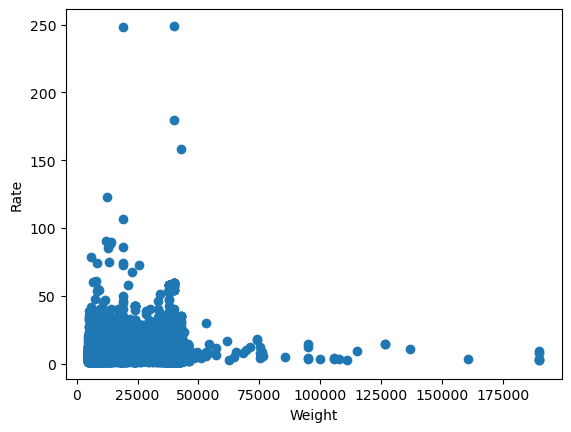

In [261]:
# Scatter plot for finding whether there is a correlation between weight (column with missing values) and rate(target) columns
plt.scatter(train_df['weight'], train_df['rate'])
plt.xlabel('Weight')
plt.ylabel('Rate')
plt.show()

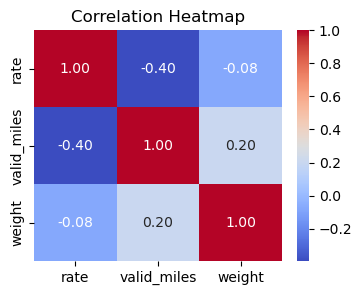

In [262]:
# finding correlations between numeric features
numeric_columns = train_df.select_dtypes(include=['number'])
correlations = numeric_columns.corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [263]:
# trying another correlation types
numeric_columns.corr(method='spearman')

,rate,valid_miles,weight
rate,1.000000,-0.698302,-0.118108
valid_miles,-0.698302,1.000000,0.220949
weight,-0.118108,0.220949,1.000000


In [264]:
numeric_columns.corr(method='kendall')

,rate,valid_miles,weight
rate,1.000000,-0.518590,-0.079025
valid_miles,-0.518590,1.000000,0.144159
weight,-0.079025,0.144159,1.000000


since missing data is small proportion and has a weak correlation with the target and other numerical features it means that it is missing completely at random (MCAR), and since there are outliers we can add median value to missing ones

In [265]:
# Apply imputation to train
train_df = impute_missing_values(train_df, 'median')

In [266]:
def plot_numeric_features(df):
    numeric_columns = df.select_dtypes(include=['number'])
    for col in numeric_columns:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        df[col].plot(kind='hist', bins=30, alpha=0.7, title=f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

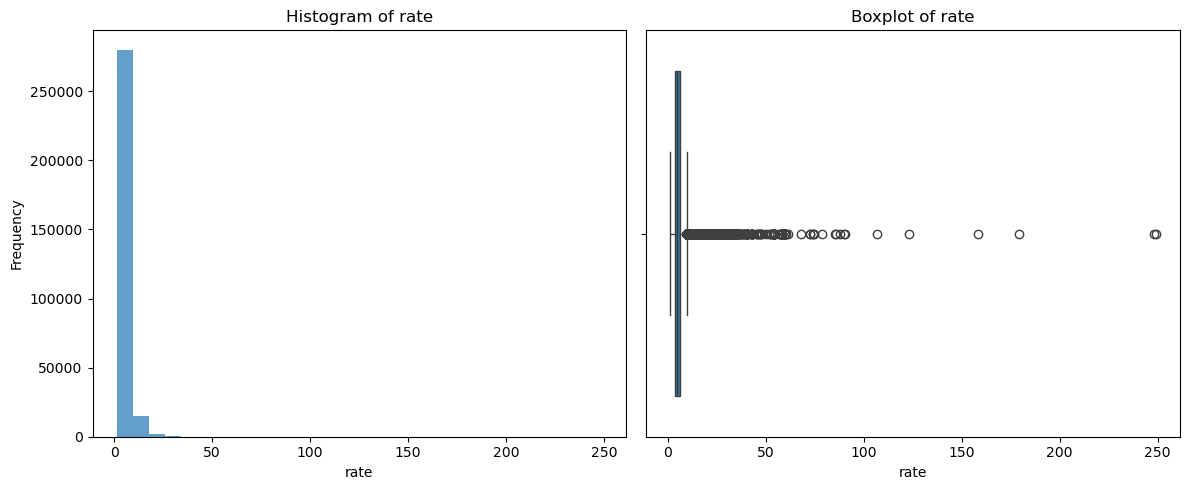

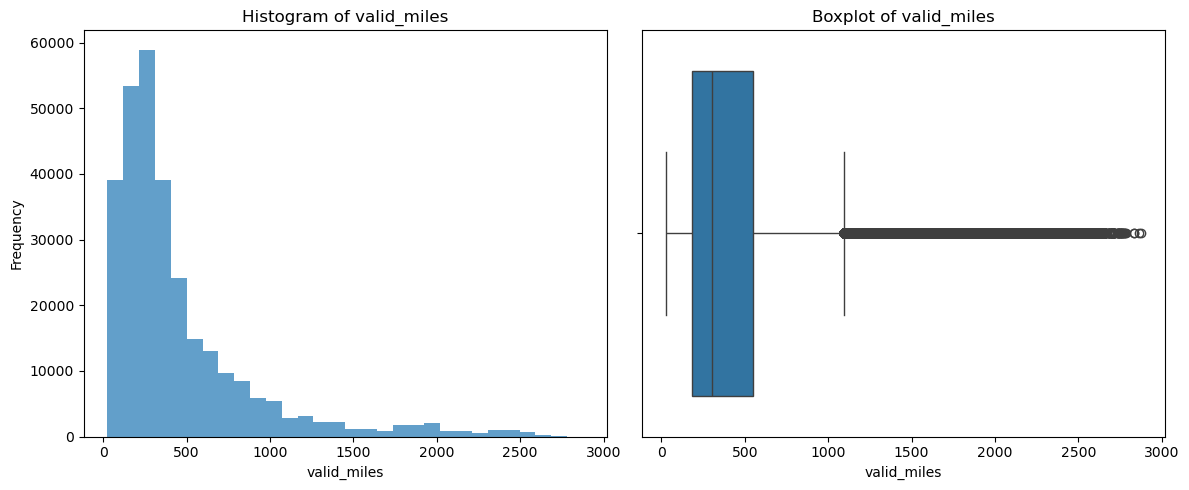

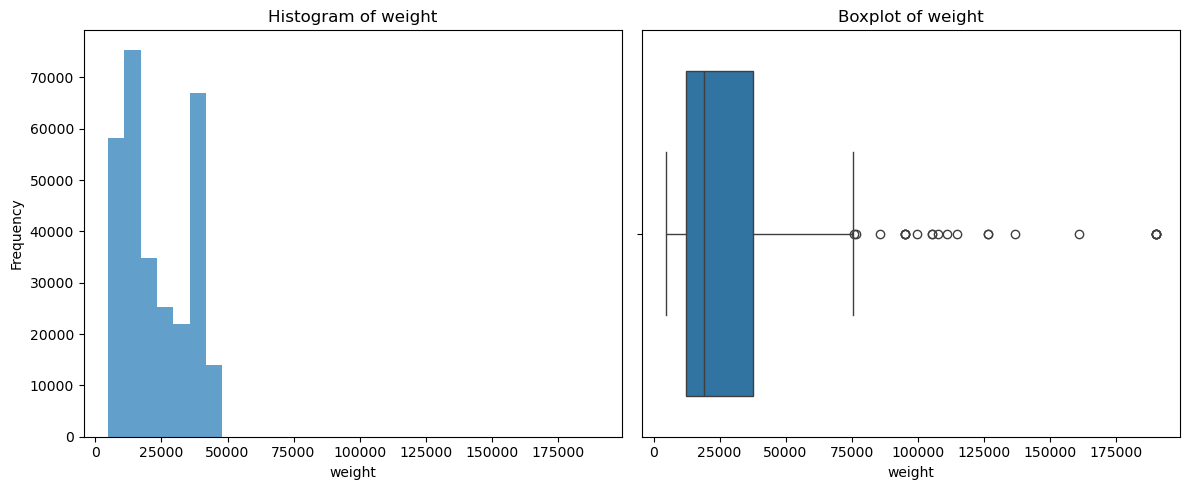

In [267]:
plot_numeric_features(train_df)

In [268]:
outlier_counts = calculate_outliers(train_df)
outlier_counts

,Feature,Outliers,Outlier Percentage (%)
0,rate,15243,5.137045
1,valid_miles,23809,8.023874
2,weight,22,0.007414


In [269]:
# since "weight" column has just a few outliers we can remove those rows
train_df = remove_outliers(train_df, ['weight'])
validation_df = remove_outliers(validation_df, ['weight'])

In [270]:
# for moderate percentage of outliers we can do log trasnformation
train_df = log_transform_features(train_df, ['valid_miles'])
validation_df = log_transform_features(validation_df, ['valid_miles'])

In [271]:
# Apply feature engineering - adding day of the week and month 
train_df['pickup_date'] = pd.to_datetime(train_df['pickup_date'])
validation_df['pickup_date'] = pd.to_datetime(validation_df['pickup_date'])
train_df = add_features(train_df)
validation_df = add_features(validation_df)

In [272]:
train_df = setting_index(train_df)
validation_df = setting_index(validation_df)

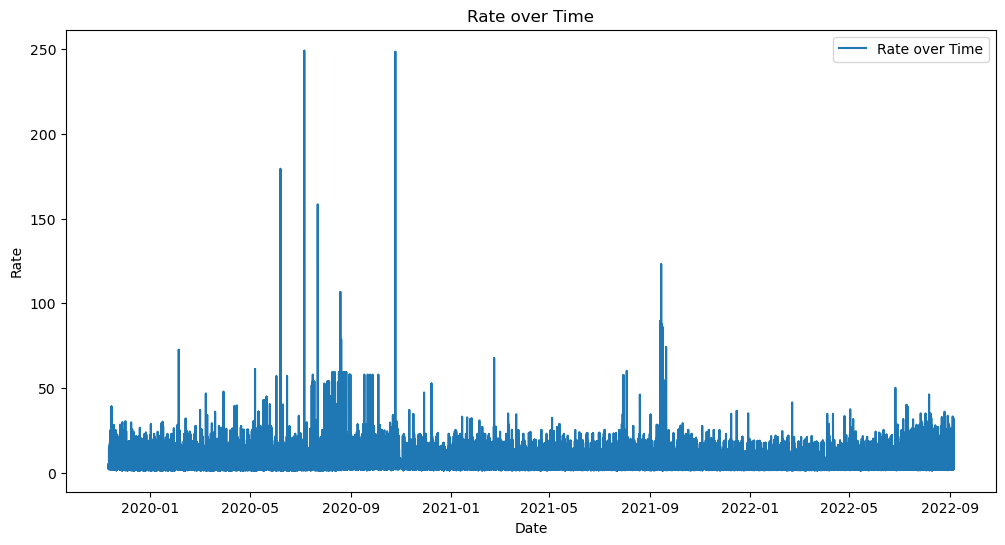

In [273]:

# Plot the rate over time
plt.figure(figsize=(12, 6))
plt.plot(train_df['rate'], label='Rate over Time')
plt.title('Rate over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

In [274]:
# Create a new column that combines 'origin_kma' and 'destination_kma
train_df['origin_destination_kma'] = train_df['origin_kma'] + "_" + train_df['destination_kma']
validation_df['origin_destination_kma'] = validation_df['origin_kma'] + "_" + validation_df['destination_kma']
test_df['origin_destination_kma'] = test_df['origin_kma'] + "_" + test_df['destination_kma']

In [275]:
train_df

,rate,valid_miles,transport_type,weight,origin_kma,destination_kma,day_of_week,month,origin_destination_kma
pickup_date,,,,,,,,,
2019-11-10 10:42:00,4.7203,6.259285,MKPFX,9231.75,OMUOI,LFUHN,6,11,OMUOI_LFUHN
2019-11-10 10:42:00,4.9005,6.279773,MKPFX,11754.95,OMUOI,LFUHN,6,11,OMUOI_LFUHN
2019-11-10 10:42:00,4.7018,6.263244,MKPFX,9603.20,OMUOI,LFUHN,6,11,OMUOI_LFUHN
2019-11-10 10:42:00,4.6388,6.334752,MKPFX,8789.05,OMUOI,LFUHN,6,11,OMUOI_LFUHN
2019-11-10 10:42:00,5.0206,6.255516,MKPFX,9597.50,OMUOI,LFUHN,6,11,OMUOI_LFUHN
...,...,...,...,...,...,...,...,...,...
2022-09-05 20:02:00,4.0141,5.650963,MKPFX,41394.00,NUTZC,AWWEE,0,9,NUTZC_AWWEE
2022-09-05 20:02:00,5.4880,5.094462,MKPFX,15220.55,FPZNC,NTODX,0,9,FPZNC_NTODX
2022-09-05 20:12:00,5.3078,6.472181,KFEGT,41280.00,RCDSS,EJLNQ,0,9,RCDSS_EJLNQ


In [276]:
categorical_columns = train_df.select_dtypes(include='object').columns.tolist()
categorical_columns

['transport_type', 'origin_kma', 'destination_kma', 'origin_destination_kma']

In [277]:
# since there are many categories onehotencoding would we a wrong option, we can do target encoding instead
train_df = target_encode(train_df, categorical_columns, 'rate') 
validation_df = target_encode(validation_df, categorical_columns, 'rate')  

In [278]:
validation_df

,rate,valid_miles,transport_type,weight,origin_kma,destination_kma,day_of_week,month,origin_destination_kma
pickup_date,,,,,,,,,
2022-09-05 20:42:00,3.7814,6.570271,5.974313,5351.0000,7.744211,9.692907,0,9,5.122296
2022-09-05 20:42:00,6.6884,6.693307,5.857787,42111.2500,5.808764,6.092733,0,9,5.983062
2022-09-05 20:42:00,3.7735,6.860399,5.857787,14609.7000,4.761496,4.604547,0,9,5.292596
2022-09-05 20:42:00,8.4960,4.196630,5.857787,7192.1000,7.658214,5.388224,0,9,9.234410
2022-09-05 20:42:00,3.6423,7.311583,5.857787,6195.6451,4.473555,5.930353,0,9,5.197682
...,...,...,...,...,...,...,...,...,...
2022-09-22 08:42:00,3.2152,7.606306,5.857787,22422.5000,5.310413,6.080660,3,9,5.404196
2022-09-22 08:42:00,6.7309,6.133975,5.857787,38061.4000,4.628229,8.063555,3,9,6.223511
2022-09-22 08:42:00,4.1380,5.689734,5.857787,19544.0000,5.310413,3.996421,3,9,5.320997


In [279]:
train_df = train_df.dropna()
validation_df = validation_df.dropna()

In [280]:
# Split features and target variable
X_train = train_df.drop(columns=['rate'])
y_train = train_df['rate']

X_validation = validation_df.drop(columns=['rate'])
y_validation = validation_df['rate']

In [146]:
#Run GridSearchCV for each model and print the results
print("Performing GridSearchCV for LightGBM...")
lgb_search = perform_grid_search(lgb_params, X_train, y_train)
print(f"Best parameters for LightGBM: {lgb_search.best_params_}")
print(f"Best MAPE for LightGBM: {-lgb_search.best_score_:.4f}")

print("Performing GridSearchCV for XGBoost...")
xgb_search = perform_grid_search(xgb_params, X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_search.best_params_}")
print(f"Best MAPE for XGBoost: {-xgb_search.best_score_:.4f}")

print("Performing GridSearchCV for Random Forest...")
rf_search = perform_grid_search(rf_params, X_train, y_train)
print(f"Best parameters for Random Forest: {rf_search.best_params_}")
print(f"Best MAPE for Random Forest: {-rf_search.best_score_:.4f}")

Performing GridSearchCV for LightGBM...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 296727, number of used features: 8
[LightGBM] [Info] Start training from score 5.221752
Best parameters for LightGBM: {'regressor': LGBMRegressor(random_state=42), 'regressor__learning_rate': 0.05, 'regressor__max_depth': -1, 'regressor__n_estimators': 100, 'regressor__num_leaves': 70}
Best MAPE for LightGBM: 0.1302
Performing GridSearchCV for XGBoost...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for XGBoost: {'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stoppin

In [147]:
# Choose the best model (lowest MAPE) and validate on the validation set
best_model = xgb_search.best_estimator_  
y_pred_validation = best_model.predict(X_validation)
validation_mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print(f'Validation MAPE for Best Model: {validation_mape:.4f}')

Validation MAPE for Best Model: 0.3181


In [154]:
def get_feature_importances(model, df):
    """
    Extract feature importances from the best model.

    """
    feature_names = df.columns.values
    if hasattr(model.named_steps['regressor'], 'feature_importances_'):
        importances = model.named_steps['regressor'].feature_importances_
        return pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
    else:
        print("The selected model does not support feature importance extraction.")
        return None

def plot_feature_importances(feature_importances):
    """
    Plot feature importances as a bar chart.
    """
    if feature_importances is not None:
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title('Feature Importances')
        plt.gca().invert_yaxis()
        plt.show()

In [158]:
feature_importances= get_feature_importances(best_model, X_train)
feature_importances

,Feature,Importance
7,origin_destination_kma,0.747338
0,valid_miles,0.114804
1,transport_type,0.033462
4,destination_kma,0.025951
2,weight,0.020953
6,month,0.019538
5,day_of_week,0.019156
3,origin_kma,0.018799


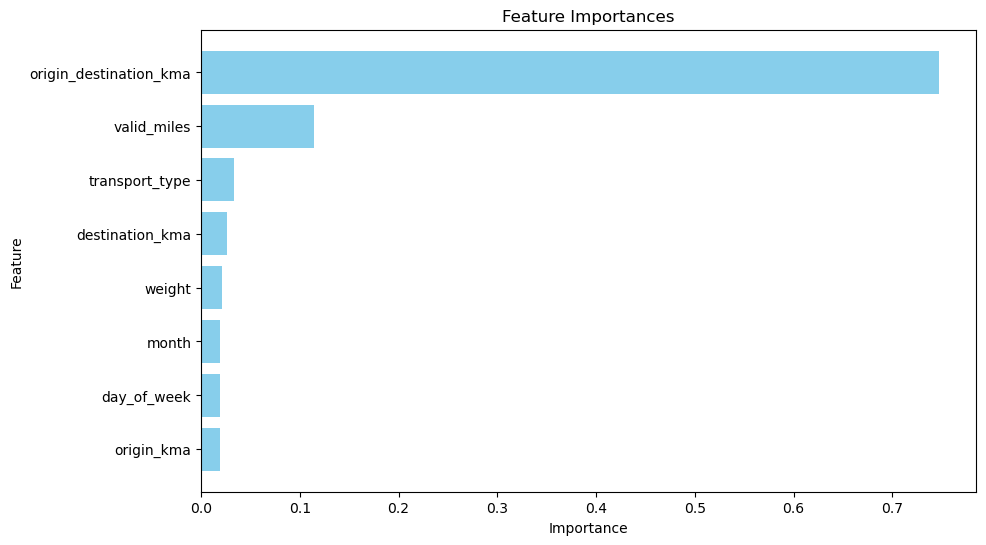

In [159]:
plot_feature_importances(feature_importances)

we have training MAPE 12% and validation MAPE 31%, so there is an overfitting issue

in order to solve that 
- Add regularization parameter
- Add early stopping
- Remove less important features
- Eliminate highly correlated features
- Reduce model complexity (lower max_depth or increase min_child_weight)

In [231]:
train_df.drop(columns=['destination_kma', 'origin_kma' , 'day_of_week', 'month'],axis=1, inplace=True)
validation_df.drop(columns=['destination_kma', 'origin_kma' , 'day_of_week', 'month'],axis=1, inplace=True)

In [232]:
# Updated tarin and test datasets
X_train = train_df.drop(columns=['rate'])
y_train = train_df['rate']

X_validation = validation_df.drop(columns=['rate'])
y_validation = validation_df['rate']

In [235]:
print("Performing GridSearchCV for XGBoost...")
xgb_search_updated = perform_grid_search(xgb_params, X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_search.best_params_}")
print(f"Best MAPE for XGBoost: {-xgb_search.best_score_:.4f}")

Performing GridSearchCV for XGBoost...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for XGBoost: {'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...), 'regressor__learning_rate': 0.05, 'regressor__max_depth': 10, 'regressor__n_estimators': 100, 'regressor__subs

In [236]:
# Choosing the best model (lowest MAPE) and validate on the validation set
best_model = xgb_search_updated.best_estimator_  
y_pred_validation = best_model.predict(X_validation)
validation_mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print(f'Validation MAPE for Best Model: {validation_mape:.4f}')

Validation MAPE for Best Model: 0.2972
